**Helpful Resource:**
- [Python Reference](http://data8.org/fa21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

## 1. Roulette

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. The table `wheel` is a representation of a Nevada roulette wheel. Note that *both* columns consist of strings. Below is an example of a roulette wheel!

In [15]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [16]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


**Question 1.** Define a function `dollar_bet_on_red` that takes the name of a color and returns your gain in dollars if that color had won and you had placed a one-dollar bet on red. Remember that the gain can be negative. Make sure your function returns an integer. **(4 points)**

You can assume that the only colors that will be passed as arguments are red, black, and green. Your function doesn't have to check that.

<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 4
-->

In [17]:
def dollar_bet_on_red(color):
    if color == 'red':
        return 1
    return -1

Run the cell below to make sure your function is working.

In [18]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


**Question 2.** Add a column labeled `Winnings: Red` to the table `wheel`. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. **(4 points)**

Your code should use the function `dollar_bet_on_red`.

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 4
-->

In [19]:
red_winnings = np.array([dollar_bet_on_red(i) for i in wheel['Color']])
wheel = wheel.append_column("Winnings: Red",red_winnings)
wheel

Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


### Simulating 10 bets on Red
Roulette wheels are set up so that each time they are spun, the winning pocket is equally likely to be any of the 38 pockets regardless of the results of all other spins. Let's see what would happen if we decided to bet one dollar on red each round.

**Question 3.** Create a table `ten_bets` by sampling the table `wheel` to simulate 10 spins of the roulette wheel. Your table should have the same three column labels as in `wheel`. Once you've created that table, set `sum_bets` to your net gain in all 10 bets, assuming that you bet one dollar on red each time. **(4 points)**

*Hint:* It may be helpful to print out `ten_bets` after you create it!

<!--
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 4
-->

In [20]:
ten_bets = wheel.sample(10)
sum_bets = ten_bets['Winnings: Red'].sum()
sum_bets

-2

In [21]:
ten_bets

Pocket,Color,Winnings: Red
4,black,-1
24,black,-1
12,black,-1
0,green,-1
31,red,1
1,red,1
6,black,-1
29,red,1
16,black,-1
1,red,1


Run the cells above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

**Question 4.** Let's see what would happen if you made more bets. Define a function `net_gain_red` that takes the number of bets and returns the net gain in that number of one-dollar bets on red. **(4 points)**

*Hint:* You should use your `wheel` table within your function definition.

<!--
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 4
-->

In [22]:
def net_gain_red(n):
    n_bets = wheel.sample(n)
    return n_bets['Winnings: Red'].sum()

net_gain_red(10)

-4

Run the cell below a few times to make sure that the results are similar to those you observed in the previous exercise.

**Question 5.** Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. After the cell is run, `all_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red. **(4 points)**

<!--
BEGIN QUESTION
name: q1_5
manual: false
points:
 - 0
 - 4
-->

In [23]:
num_bets = 200
repetitions = 10000
all_gains_red = np.zeros(10000)

for i in np.arange(repetitions):
    all_gains_red[i] = net_gain_red(num_bets) 

len(all_gains_red) # Do not change this line! Check that all_gains_red is length 10000.

10000

In [24]:
all_gains_red.reshape(-1,100) # for reference

array([[-24., -20., -26., ..., -20.,  -4.,  -4.],
       [  6., -14.,   0., ..., -12., -12., -36.],
       [-24.,  -8.,  12., ...,   2.,  14.,  -6.],
       ...,
       [ -8., -30.,  14., ...,   0., -32.,  -2.],
       [-14., -12.,  -6., ..., -22., -14., -22.],
       [ -6.,  -2., -28., ..., -12., -10., -24.]])

Run the cell below to visualize the results of your simulation.

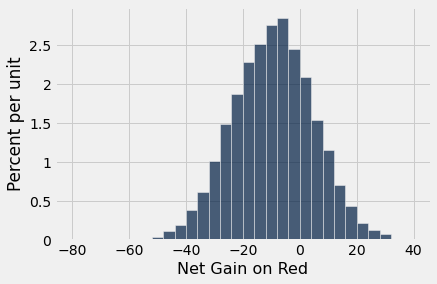

In [25]:
gains = Table().with_columns('Net Gain on Red', all_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

**Question 6:** Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question. **(4 points)**

<!--
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 4
-->

In [26]:
loss_more_than_50 = True

### Betting on a Split ###
If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bets pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

**Question 7.** Define a function `dollar_bet_on_split` that takes a pocket number and returns your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

*Hint:* Remember that the pockets are represented as strings.

<!--
BEGIN QUESTION
name: q1_7
manual: false
points:
 - 4
-->

In [27]:
def dollar_bet_on_split(pn):
    if (pn == '5') | (pn == '6'):
        return 17
    return -1

In [28]:
print(dollar_bet_on_split('5'))
print(dollar_bet_on_split('6'))
print(dollar_bet_on_split('00'))
print(dollar_bet_on_split('23'))

17
17
-1
-1


**Question 8.** Add a column `Winnings: Split` to the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

<!--
BEGIN QUESTION
name: q1_8
manual: false
points:
 - 0
 - 4
-->

In [29]:
split_winnings = np.array([dollar_bet_on_split(i) for i in wheel['Pocket']])
wheel = wheel.append_column('Winnings: Split',split_winnings)
wheel.show(5) # Do not change this line.

Pocket,Color,Winnings: Red,Winnings: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1


**Question 9.** Simulate the net gain in 200 one-dollar bets on the 5-6 split, repeating the process 10,000 times and saving your gains in the array `all_gains_split`. **(4 points)**

*Hint:* Your code in Questions 4 and 5 may be helpful here!

<!--
BEGIN QUESTION
name: q1_9
manual: false
points:
 - 0
 - 4
-->

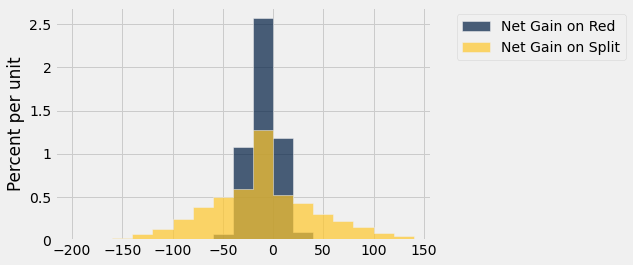

In [30]:
def net_gain_split(n):
    n_bets = wheel.sample(n)
    return n_bets['Winnings: Split'].sum()

num_bets = 200
repetitions = 10000
all_gains_split = np.zeros(10000)

for i in np.arange(repetitions):
    all_gains_split[i] = net_gain_split(num_bets)


# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', all_gains_split)
gains.hist(bins = np.arange(-200, 150, 20))

**Question 10.** Look carefully at the histograms above and say whether each of the following statements is `True` or `False`. **(4 points)**

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

Assign the `histogram_statements` to an array of statement number(s) that corresponding to `True` statements.

*Hint:* We've already seen one of these statements in a prior question.

<!--
BEGIN QUESTION
name: q1_10
manual: false
points:
 - 0
 - 4
-->

In [31]:
histogram_statements = np.array([True,True,False])

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.